In [ ]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import DownloadFRED
import time
import dateutil

%matplotlib inline

## 2. Variables

In this section we'll focus on the variables we'll use in the model (aka the independent variables, the explanatory variables, the features, ...). Our goals will be to:

 * Read about which variables Hull et al. selected 
 * Collect the data
 * Combine the data into a single dataset
 * Explore the data
 * Do some data preprocessing to transform the variables into other forms
 
 Let's begin!

<div class="alert alert-info" role="alert">
<span class="label label-primary"> The Paper </span>

2.1 Data and Variables 

 <a href='#supplemental_content_1'>The primary sources we use</a> to obtain our data are Bloomberg, the Federal Reserve Board, and the Archival Economic Data from the Federal Reserve Bank of St. Louis (ALFRED).
<br><br>

Motivated by Chen et al. (1986), we include macroeconomic variables which may proxy for future investment opportunities as forecasting variables: change in inflation, industrial production, credit risk premium, and the slope of the interest rate term structure.  Whereas Chen et al. (1986) focused on the cross-section of stocks returns, our focus is on forecasting the aggregate stock market.  We add changes in commodity prices, the dollar exchange rate, as well as other variables that may reveal prevailing business conditions.  The full set of forecasting variables we consider is as follows:  

1. Change in Inflation (UI): Monthly change in the inflation rate net of the change in the risk-free rate.  Inflation is calculated as the percentage change in the Consumer Price Index from ALFRED and the risk-free rate is the three-month Treasury bill rate from Bloomberg.  Positive change in inflation is associated with higher future market excess returns.  Our variable is similar to “unexpected inflation” in Chen et al. (1986), calculated as the difference between inflation and its expectation using the Fama and Gibbons (1984) method.   
<br><br>

2. Industrial Production (IP): Monthly change in the industrial production index published by ALFRED.  IP serves as a leading indicator for the real economy, and is positively associated with future market excess returns (Chen et al., 1986).  
<br><br>

3. Credit Risk Premium (CRP): The difference between the BAA and AAA corporate bond yields, also known as the default spread, obtained from Bloomberg.  Fama and French (1989) demonstrate that a higher CRP is associated with higher future market excess returns.     
<br><br>

4. Slope of the Interest Rate Term Structure (STS): The difference between the 10-year Treasury note and the three-month Treasury bill yields from Bloomberg.  This quantity is sometimes called the term spread.  STS is positively associated with future market excess returns (Fama and French, 1989).   
<br><br>

5. Commodity Price (CP): We use the monthly change in the S&P GSCI index to track the movements in oil price, since the fluctuations in the GSCI are predominantly driven by oil price changes.  Historically commodity prices and stock prices have been negatively correlated.  We expect an increase in CP to be associated with lower future market excess returns (Black et al., 2014; Casassus and Higuera, 2011).   
<br><br>

6. Housing Starts (HS): Monthly difference in the housing starts index from ALFRED.  HS is another leading indicator for market cycles, and should be positively correlated with future market excess returns (Flannery and Protopapadakis, 2002). 
<br><br>

7. Exchange Rate (EVUSD): Monthly change in the U.S. Dollar Index (DXY) from Bloomberg.  Higher dollar exchange predicts lower future market excess returns (Bahmani-Oskooee and Sohrabian, 1992). 
<br><br>

8. FRB Loan Officer Survey (LOAN): We compute what fraction of banks have been tightening lending conditions compared to the previous quarter as a proxy for the change in lending conditions among U.S. banks.  This variable is from the Federal Reserve Board (Lown et al., 2000).  An increase in LOAN indicates credit tightening, which we expect to be associated with lower future economic activity and lower future excess returns.   
<br><br>

9. Delinquencies (DL): Annual change in delinquencies from the Federal Reserve Board.  Similar to LOAN, this is another variable that we use to capture the macroeconomic conditions of banks, and complements the information contained in LOAN.  Higher DL forecasts lower future excess returns (Lown et al., 2000). 
<br><br>

10. New Orders New Shipments (NONS): The value of new orders and new shipments excluding defense and aircraft.  We exclude defense and aircraft spending to focus on the core capital goods which reveal the underlying trend in real economic activity.  Higher NONS is associated with lower future market excess returns (Jones and Tuzel, 2012). 
<br><br>

11. Baltic Dry Index (BD): Monthly percent change in the Baltic Dry Index from Bloomberg.  We use BD to track global shipping as one measurement of macroeconomic conditions.  BD is a leading indicator of economic cycles, and is positively correlated with future excess returns. (Bakshi, Panayotov, and Skoulakis, 2011) 
<br><br>

12. National Association of Purchasing Managers (NAPM) Survey: The difference between the manufacturing survey new orders and the prices paid indexes from ALFRED.  An increase in NAPM signifies an expansion which is a leading positive indicator for stocks.   
<br><br>

13. Change in Unemployment Rate (UR): Monthly change in the unemployment rate from ALFRED.  Increases in the unemployment rate indicate deteriorating macroeconomic conditions in the future and are associated with low future market excess returns (Flannery and Protopapadakis, 2002). 
<br><br>

14. Momentum (MOM): Monthly percent change in the price return of the S&P 500.  Moskowitz et al. (2012) suggests past 12-month returns are a positive signal for next month’s returns.  We use past one-month return to capture shorter trend in the data.  MOM positively predicts future excess returns. 
<br><br>

15. PCA of Price Ratios (PRC): We include the first principal component of the cyclically adjusted price-to-earnings ratio (CAPE), cyclically adjusted price to total yield (dividends plus buybacks), and the price-to-book ratio.  This composite variable is negatively correlated with future market excess returns.  Shiller (2000) proposed the first use of CAPE, and Hull and Qiao (2017) reduce the dimension of price-based variables through PCA.   
<br><br>

<span class="label label-warning"> Assessment: Remember </span>

Ok, so that was quick. But there's quite a bit of work to do to actually collect the above data. Let's start with an assessment question and then we'll move to data collection/coding. 

In the dictionary below and using the details above, input the expected correlation of each variable with the target variable (the one-month forward return of the S&P 500). Etner '+' for positive expected correlations and '-' for negative expected correlations. 

It is useful to define our expectations because we want to check the coefficients we derive against our expectations. Recall that in the stepwise variable selection procedure we pick variables based on how strong an impact it has on model performance. Well here's another criteria for selecting variables: only keep variables that are correlated to our target variable in the expected (correct) direction.  For example, if the data indicates that the change in inflation is negatively correlated with returns but our expectation is that it should be positive, then that's reason to exclude that variable.



In [ ]:
# TODO

coefficient_signs = {'change_inflation': '',
                    'industrial_production': '',
                    'credit_risk_premium': '',
                    'slope_interst_rate': '',
                    'commodity_price': '',
                    'housing_starts': '',
                    'exchange_rate': '',
                    'frb_loan_survey': '',
                    'delinquencies': '',
                    'new_orders_new_shipments': '',
                    'baltic_dry': '',
                    'napm': '',
                    'change_unemployment': '',
                    'momentum': '',
                    'pca_price_ratios': ''}

<span class="label label-warning"> Assessment: Understand </span>

Explain why are higher delinquencies negatively correlated with future returns? 

Explain why is the credit risk premium positively correlated with future returns?

Are there any correlations you don't understand or think are mistakes?

[enter your answer here]

Now we'll start downloading the data and to begin we'll focus on the data from the Federal Reserve. You can accress FRED and ALFRED here:

https://fred.stlouisfed.org/

Let's look first for inflation data. Enter "inflation" into the search bar on the FRED homepage and you'll see close to  16,000 results for inflation. For example, the Fed has data for:
 * 10-Year Breakeven Inflation Rate
 * 5-Year, 5-Year Forward Inflation Expectation Rate
 * Consumer Price Index for All Urban Consumer: All Items
 * Consumer Price Index for All Urban Consumers: All Items Less Food and Energy
 * and many more...
 
So here's a lesson: sometimes it's not clear what data series to use and sometimes it's not clear what data series someone else is using. Without a lot of domain knowledge you could get lost. For example should we use the Consumer Price Index for All Urban Consumers or should we not limit ourselves to just urban consumers. And should we include Food and Energy or exclude those items. Domain knowledge will tell you which data series people will generally gravitate towards but that doesn't make it "right". Maybe while everyone else is using the "right" data series you can use one that no one thinks about and unlock some hidden value. 

Ideally you'd want to compare all the data series, understand why they diverge (or why they all basically say the same thing), and then test them all. 

But that's a lot of work and no one sorts through 16,000 different data series related to inflation. As a general rule, when dealing with inflation people tend to exclude food and energy costs because those make the series more volatile... but you don't have to if you don't want to. 

So let's click into that data series "Consumer Price Index for All Urban Consumers: All Items Less Food and Energy" and we can see that it has an associated ticker "CPILFESL". The webpage shows a graph of the value, provides the latest value (256.889 for May 2018 and as of June 12, 2018), and also indicates that this is a monthly series that is seasonally adjusted. There is a button to download the data into excel or as a tab-delimited file. 

As programming people, that'd be terrible if we had to manually download everything into excel and repeat that exercise everytime we wanted to sfee a new update. But luckily we can download it straight from python/pandas. We'll use the pandas-datareader library



In [10]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################


import pandas as pd
import pandas_datareader.data as web
import datetime


# define the date range for the data we want to download 
start_date = datetime.datetime(2000,1,1)
end_date = datetime.datetime(2018,12,31)

# download data for Consumer Price Index for All Urban Consumers: All Items Less Food and Energy
cpilfesl = web.DataReader("CPILFESL", "fred", start_date, end_date)

print('see the data:')
print(cpilfesl.head())
print(cpilfesl.tail())


see the data:
            CPILFESL
DATE                
2000-01-01     179.3
2000-02-01     179.4
2000-03-01     180.0
2000-04-01     180.3
2000-05-01     180.7
            CPILFESL
DATE                
2018-01-01   255.287
2018-02-01   255.751
2018-03-01   256.200
2018-04-01   256.450
2018-05-01   256.889


Hull et al. say that they use inflation like this:

"Change in Inflation (UI): Monthly change in the inflation rate net of the change in the risk-free rate. Inflation is calculated as the percentage change in the Consumer Price Index from ALFRED and the risk-free rate is the three-month Treasury bill rate from Bloomberg. Positive change in inflation is associated with higher future market excess returns. Our variable is similar to “unexpected inflation” in Chen et al. (1986), calculated as the difference between inflation and its expectation using the Fama and Gibbons (1984) method."

Note that Hull et al. say they use the Consumer Price Index whereas we have downloaded the Consumer Price Index for All Urban Consumers: All Items Less Food and Energy. So we are beginning to diverge from their study in small ways...

So we want the change in monthly change in the Consumer Price Index. Let's calculate that:

In [22]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

# calculate the change in the consumer price index (inflation)
cpilfesl['monthly_inflation'] = cpilfesl / cpilfesl.shift(1) - 1.0 

print('see the data:')
print(cpilfesl.head())
print(cpilfesl.tail(20))


see the data:
            CPILFESL  monthly_inflation
DATE                                   
2000-01-01     179.3                NaN
2000-02-01     179.4           0.000558
2000-03-01     180.0           0.003344
2000-04-01     180.3           0.001667
2000-05-01     180.7           0.002219
            CPILFESL  monthly_inflation
DATE                                   
2016-10-01   249.064           0.001399
2016-11-01   249.519           0.001827
2016-12-01   249.996           0.001912
2017-01-01   250.661           0.002660
2017-02-01   251.088           0.001703
2017-03-01   250.904          -0.000733
2017-04-01   251.125           0.000881
2017-05-01   251.331           0.000820
2017-06-01   251.690           0.001428
2017-07-01   252.050           0.001430
2017-08-01   252.610           0.002222
2017-09-01   252.943           0.001318
2017-10-01   253.484           0.002139
2017-11-01   253.791           0.001211
2017-12-01   254.398           0.002392
2018-01-01   255.287      

Great, so now we have inflation data and we can use it to build a model to predict the stock market and make a lot of money!

Wait, not so fast. You've inadvertently traveled into the future!

Professor Balch talked about a little bit about "data leakage" in <i>What Hedge Funds Really Do: An Introduction to Portfolio Management</i>:

"<i>Peeking" into the future: You know the actual history of financial markets, which a contemporary from your back testing period would not. You can choose a strategy that is, at least unconciously, designed for those conditions. It is important to make sure that the period from which you drew your inspiration in designing the tested strategy is not the same as the period from which your bask testing data come. Otherwise, you are simply confirming a tautology.</i>

Here's an example. Enron is a company that collapsed due to financial fraud. But before they did, they were a winning stock and people loved them. At the time we thought they were earning a billion dollars each year. Now we know they were actually losing a billion dollars each year but telling people otherwise. If we were investing with today's knowledge that they were a fraud, we could avoid holding their stock as they headed into bankruptcy. But we didn't know that at the time. So we would have read their financial statement that they earned a billion dollars and would have happily invested in their stock right up until the moment they collapsed. 

Usually, data leakage isn't as severe as the Enron example but data leakage is (probably) pervasive. Datasets are constantly being revised as statisticians get better estimates of a macroeconomic data series and company fundamentals like earnings are continuously revised. 

Relatedly, sometimes it's not clear when a piece of data gets published. For example, when did Exonn first publish it's profit for the year 2017? It wasn't on December 31, 2017. And it wasn't on January 1, 2018. For company fundamental data, most researchers assume it's 1.5 months after the period end but that's not going to be true for all companies. Some companies won't publish until 3 months later more. 

Let's look at the data above for the Consumer Price Index. When did the 2018-05-1 data point become available? From the data we downloaded that's not at all clear. 

Most data providers don't keep track of revisions to data and many don't keep track of publication dates, even the data providers that charge tens of thousands of dollars a year. And a lot of academics usually don't bother with the laborious exercise of identifying what piece of data was available at a given point in time. Arguably, this has contributed to a "reproducibility crisis" whereby many results in finance and economics can't be replicated (see XXXXXX where only 50% of prior results were replicated).

We should try to do better (though we may not always be able to and that's why paper trading is important). 

Let's switch from FRED to ALFRED so we can get as-published data from the Federal Reserve. Here's some resources for Alfred

https://alfred.stlouisfed.org/

https://research.stlouisfed.org/docs/api/fred/alfred.html

https://research.stlouisfed.org/docs/api/fred/realtime_period.html

https://github.com/mortada/fredapi

Let's use the last link above to pull the real-time data into python. The code has been saved to DownloadFRED.py in the same directory as this notebook so we can just import the class (import is done at the top of this notebook). 

In [36]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

# you need to register an account with the Federal Reserve and request an api key
# enter the api key below:
fred_api = DownloadFRED.Fred(api_key = 'e9f560e10d127ddb6487a9684b583a1e')
temp = fred_api.get_series_all_releases('CPILFESL')

print('--See the data:')
print(temp.head())
print()
print(temp.tail())
print()
print() 

print('--Look at the revision history for the CPI figure for July 2017:')
print(temp[temp['date'] == pd.to_datetime('2017-07-01')])
print()

print('--So on August 11, 2017, a CPI value of 251.914 was published for the July 2017 CPI figure')
print('and a revision was published on February 14, 2018 to 252.05 for the July 2017 CPI figure ')

--See the data:
                  date       realtime_start value
0  1957-01-01 00:00:00  1996-12-12 00:00:00  28.5
1  1957-02-01 00:00:00  1996-12-12 00:00:00  28.6
2  1957-03-01 00:00:00  1996-12-12 00:00:00  28.7
3  1957-04-01 00:00:00  1996-12-12 00:00:00  28.8
4  1957-05-01 00:00:00  1996-12-12 00:00:00  28.8

                     date       realtime_start    value
1682  2018-01-01 00:00:00  2018-02-14 00:00:00  255.287
1683  2018-02-01 00:00:00  2018-03-13 00:00:00  255.751
1684  2018-03-01 00:00:00  2018-04-11 00:00:00    256.2
1685  2018-04-01 00:00:00  2018-05-10 00:00:00   256.45
1686  2018-05-01 00:00:00  2018-06-12 00:00:00  256.889


--Look at the revision history for the CPI figure for July 2017:
                     date       realtime_start    value
1670  2017-07-01 00:00:00  2017-08-11 00:00:00  251.914
1671  2017-07-01 00:00:00  2018-02-14 00:00:00   252.05

--So on August 11, 2017, a CPI value of 251.914 was published for the July 2017 CPI figure
and a revision was p

<span class="label label-warning"> Assessment: Understand </span>

Let's think about how to use real-time data when simulating a trade:

 * What CPI figure for July 2017 should we use if we are trying to simulate making a trade on August 5, 2017? 

 * What value should we use for July 2017 when trying to simulate a trade on December 31, 2017? 

 * What figure should we use for July 2017 if we put on a trade today?

<span class="label label-warning"> Assessment: Apply </span>
    
Write a function that will download the data for a ticker and construct a view of the data from the perspective of a given set of dates. 

So let's say we want CPI data and we want to simulate putting on monthly trades with the most recent data on each date. We should construct a dataframe with the columns: portfolio_date, date, realtime_start, value. The portfolio_date is the date of the trade (eg June 30). The date is the period that the most recent data item comes from (eg May CPI is the most recent datapoint as of June 30).  Realtime_start is the date that the May CPI was published (eg June 7). And the value is the CPI value for May.  None of the realtime_start values should be after June 30.

Note that FRED seems to have started publishing in 1996 (the first realtime_start value for a lot of series is from 1996). But that doesn't mean that people weren't able to access CPI data prior to 1996. We're going to have to make a decision about when the data series was actually first published. For instance, was the March 1950 CPI data published a month after the end of the March? 2 months? 3 months? 

This is an example where we just have to make an assumption. Hopefully the assumption will be good, or if it's bad, that the consequence will be trivial. But we'll never really know and taking advantage of data from the future may make us overconfident about a strategy when we just analyze backtest results.  

In [ ]:
# TODO

def construct_dataframe(ticker, days_till_publication, start_date, end_date, data_frequency):

    '''
    construct a view of a data series from the perspective of some point in time
    (what data was actually available to someone on a given date?)
    
    :param ticker: the FRED ticker, as string
    :param days_till_publication: the number of days we'll assume after period end that a datapoint was published, as integer
    :param start_date: first day you want of the dataset you want to construct in "YYYY-MM-DD" format
    :param end_date: last day you want of the dataset you want to construct in "YYYY-MM-DD" format
    :param data_frequency: frequency of the data you want to construct, either "D" or "M"
    # TODO
    

In [63]:


def construct_dataframe(ticker, days_till_publication, start_date, end_date, data_frequency):

    '''
    construct a view of a data series from the perspective of some point in time
    (what data was actually available to someone on a given date?)
    
    :param ticker: the FRED ticker, as string
    :param days_till_publication: the number of days we'll assume after period end that a datapoint was published, as integer
    :param start_date: first day you want of the dataset you want to construct in "YYYY-MM-DD" format
    :param end_date: last day you want of the dataset you want to construct in "YYYY-MM-DD" format
    :param data_frequency: frequency of the data you want to construct, either "D" or "M"
    '''
    start = time.time()

    # get the data series, including revisions and publication dates
    data = fred_api.get_series_all_releases(ticker)

    # dates can be tricky, especially if you have multiple columns that are different date objects 
    # (they are both dates but different types of date objects and therefore they don't
    # work well with each other)
    # for convenience, let's just convert all dates to timestamp
    data['date'] = pd.to_datetime(data['date'])
    data['realtime_start'] = pd.to_datetime(data['realtime_start'])
    data.sort_values(by = ['date', 'realtime_start'], inplace = True)

    # identify the rows that were part of the 'first publication' of the data
    mask = data['realtime_start'] == data['realtime_start'].min()

    # for the above rows, estimate the publication date
    data.loc[mask, 'realtime_start'] =  data.loc[mask, 'date'] + pd.DateOffset(days = days_till_publication)

    # construct a daily/monthly dataset
    dates = pd.date_range(start_date, end_date, freq = data_frequency)
    collection = pd.DataFrame()
    # iterate through dates you want to make a trade
    for date in dates:

        # get the data that was available on the given date
        most_recent_df = data[data['realtime_start'] <= date].copy()

        # set the portfolio construction date as the given date
        most_recent_df['portfolio_date'] = date

        # keep the most recent version of each data item (eg the most recently published value for November 2013 CPI)
        most_recent_df.drop_duplicates(subset = 'date', keep = 'last', inplace = True)

        # keep the last observation 
        # this represents the most recently available information on the variable 
        # with respect to the portfolio construction date
        most_recent_df = most_recent_df[['portfolio_date', 'date', 'realtime_start', 'value']]
        most_recent_df = most_recent_df.iloc[-1]
        collection = collection.append(most_recent_df)

    print(time.time() - start)
    return collection[['portfolio_date', 'date', 'realtime_start', 'value']]
    
construct_dataframe(ticker = 'CPILFESL',
                    days_till_publication = 35, 
                    start_date = '2008-01-01', 
                    end_date = '2018-06-30', 
                    data_frequency = 'M')

1.5194835662841797


,portfolio_date,date,realtime_start,value
1077,2008-01-31,2007-12-01,2008-01-16,213.148
1083,2008-02-29,2008-01-01,2008-02-20,213.765
1089,2008-03-31,2008-02-01,2008-03-14,213.851
1095,2008-04-30,2008-03-01,2008-04-16,214.176
1101,2008-05-31,2008-04-01,2008-05-14,214.398
1107,2008-06-30,2008-05-01,2008-06-13,214.832
1113,2008-07-31,2008-06-01,2008-07-16,215.526
1119,2008-08-31,2008-07-01,2008-08-14,216.230
1125,2008-09-30,2008-08-01,2008-09-16,216.650
1131,2008-10-31,2008-09-01,2008-10-16,216.956


<span class="label label-warning"> Assessment: Apply </span>
    
So now hopefully you can construct a real-time view of a single data series. Let's keep going and try to construct the Change in Inflation variable that Hull et al. use. 

Make a dataset with the monthly Change in Inflation. This should be a dataframe with columns portfolio_date, date and change_inflation. The rows are monthly data points from the start of time through to the last monthly date available through July 7, 2013. 


In [ ]:
# TODO

1.3398759365081787
1.5049831867218018


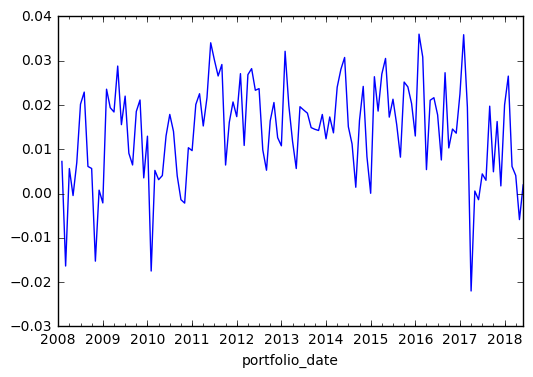

In [73]:

%matplotlib inline
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

def make_change_inflation_dataset(days_till_publication,
                                 start_date,
                                 end_date,
                                 data_frequency):



    # 1. get 3m treasury bill rate
    ust_3m = construct_dataframe(ticker = 'TB3MS', 
                                 days_till_publication = days_till_publication,
                                start_date = start_date,
                                end_date = end_date,
                                data_frequency = data_frequency)

    # ATTENTION: make sure you know your data
    # the value is given in percent units -> convert to absolute number
    ust_3m['value'] /= 100

    ust_3m.rename(columns = {'value': 'ust_3m_rate',
                            'date': 'ust_3m_date',
                            'realtime_start': 'ust_3m_realtime_start'}, inplace = True)
    #ust_3m = ust_3m[['date', 'ust_3m_rate']]

    # 2. get cpi data
    cpi = construct_dataframe(ticker = 'CPILFESL', 
                              days_till_publication = days_till_publication,
                              start_date = start_date,
                              end_date = end_date,
                              data_frequency = data_frequency)
    cpi['monthly_cpi_change'] = cpi['value'] / cpi['value'].shift(1) - 1.0 

    # ATTENTION: make sure you know your data
    # you've just calculated a monthly change.
    # the treasury rate above is an annual rate
    # let's annualize the monthly change in the cpi in order to have an apple-to-apple comparison
    cpi['monthly_cpi_change'] *= 12

    cpi.rename(columns = {'value': 'cpi_less_food_energy',
                         'date': 'cpi_less_food_energy_date',
                         'realtime_start': 'cpi_less_food_energy_realtime_start'}, inplace = True)
    #cpi = cpi[['date', 'cpi_less_food_energy', 'monthly_cpi_change']]

    # 3. combine the cpi and treasury rate information
    combined = cpi.merge(ust_3m, how = 'outer', on = 'portfolio_date')
    combined.sort_values(by = 'portfolio_date', inplace = True)

    # 4. now calculate the change in inflation less the ust 3m rate
    combined['change_inflation'] = combined['monthly_cpi_change'] - combined['ust_3m_rate']

    return combined
    
change_inflation = make_change_inflation_dataset(days_till_publication = 35,
                                                start_date = '2008-01-01', 
                                                end_date = '2018-06-30', 
                                                data_frequency = 'M')
change_inflation.set_index('portfolio_date')['change_inflation'].plot()

<span class="label label-warning"> Assessment: Apply </span>

Great! So that's one variable. Now let's do the other 14 variables. 

If you don't get all of them that's ok. Can you find substitutes? Can you live without testing the missing variable?

In [ ]:
# TODO

def make_change_inflation_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_industrial_production_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
     pass
    
def make_credit_risk_premium_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency): 
     pass

def make_slope_interest_rate_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
     pass

def make_commodity_price_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_housing_starts_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_exchange_rate_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_frb_loan_survey_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_delinquencies_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_new_orders_new_shipments_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_baltic_dry_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_napm_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_change_unemployment_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_momentum_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_pca_price_ratios_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass



2.056533098220825


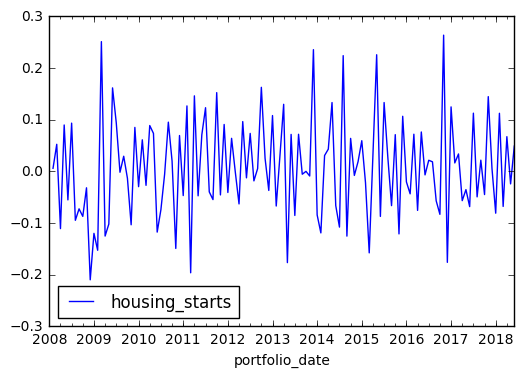

In [84]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

def make_industrial_production_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    
    # produces a monthly dataset
    ind_prod = construct_dataframe(ticker = 'INDPRO', 
                                  days_till_publication = days_till_publication,
                                  start_date = start_date,
                                  end_date = end_date,
                                  data_frequency = data_frequency)
    ind_prod['industrial_production'] = ind_prod['value'] / ind_prod['value'].shift(1) - 1.0
    ind_prod['industrial_production'] *= 12
    ind_prod = ind_prod[['portfolio_date', 'industrial_production']]
    return ind_prod

    
def make_credit_risk_premium_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency): 
    
    # produces a daily dataset
    aaa = construct_dataframe(ticker = 'BAMLC0A1CAAAEY',
                              days_till_publication = days_till_publication,
                               start_date = start_date,
                               end_date = end_date,
                               data_frequency = data_frequency)
    aaa.rename(columns = {'value': 'aaa_yield'}, inplace = True)
    aaa = aaa[['portfolio_date', 'aaa_yield']]
    
    bbb = construct_dataframe(ticker = 'BAMLC0A4CBBBEY', 
                             days_till_publication = days_till_publication,
                             start_date = start_date,
                             end_date = end_date,
                             data_frequency = data_frequency)
    bbb.rename(columns = {'value': 'bbb_yield'}, inplace = True)  
    bbb = bbb[['portfolio_date', 'bbb_yield']]
    
    combined = aaa.merge(bbb, how = 'outer', on = 'portfolio_date')
    combined['credit_risk_premium'] = combined['bbb_yield'] - combined['aaa_yield']
    combined = combined[['portfolio_date', 'credit_risk_premium']]
    return combined
                               

def make_slope_interest_rate_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    
    slope = construct_dataframe(ticker = 'T10Y3M',
                               days_till_publication = days_till_publication,
                               start_date = start_date,
                               end_date = end_date,
                               data_frequency = data_frequency)
    slope.rename(columns = {'value': 'slope_interest_rate'}, inplace = True)
    slope['slope_interest_rate'] /= 100
    slope = slope[['portfolio_date', 'slope_interest_rate']]
    return slope

def make_commodity_price_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_housing_starts_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    
    housing = construct_dataframe(ticker = 'HOUST', 
                                 days_till_publication = days_till_publication,
                                 start_date = start_date,
                                 end_date = end_date,
                                 data_frequency = data_frequency)
    
    housing['housing_starts'] = housing['value'] / housing['value'].shift(1) - 1.0
    housing = housing[['portfolio_date', 'housing_starts']]
    return housing

def make_exchange_rate_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_frb_loan_survey_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_delinquencies_dataset(days_till_publication, 
                              start_date,
                              end_date,
                              data_frequency):
    
    delinquencies = construct_dataframe(ticker = 'DRSFRMACBS', 
                                       days_till_publication = days_till_publication,
                                       start_date = start_date,
                                       end_date = end_date,
                                       data_frequency = data_frequency)
    
    # annual change in delinquencies
    delinquencies['delinquencies'] = delinquencies['value'] -  delinquencies['value'].shift(12)
    delinquencies['delinquencies'] /= 100
    delinquencies = delinquencies[['portfolio_date', 'delinquencies']]
    return delinquencies

def make_new_orders_new_shipments_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_baltic_dry_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequencyn):
    pass

def make_napm_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

def make_change_unemployment_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    
    unemployment = construct_dataframe(ticker = 'UNRATE',
                                       days_till_publication = days_till_publication,
                                       start_date = start_date,
                                       end_date = end_date,
                                       data_frequency = data_frequency)
    unemployment['change_unemployment'] = unemployment['value'] -  unemployment['value'].shift(1)
    unemployment = unemployment[['portfolio_date', 'change_unemployment']]
    return unemployment


def make_momentum_dataset(days_till_publication, 
                          start_date,
                          end_date,
                          data_frequency):
    pass

def make_pca_price_ratios_dataset(days_till_publication, 
                                  start_date,
                                  end_date,
                                  data_frequency):
    pass

data_series = make_housing_starts_dataset(days_till_publication = 35, start_date = '2008-01-01', end_date = '2018-06-30', data_frequency = 'M')
data_series.set_index('portfolio_date').plot()

<span class="label label-warning"> Assessment: Apply </span>
    
Now let's combine all the individual variable series into a single dataset. Again, each row of the dataframe should correspond to the point in time when you put on a trade and the columns correspond to the most recent variables that were available at that date.

In [ ]:
# TODO

df = # TODO

In [85]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################
# collect all the individual data series

start_date = '2008-01-01'
end_date = '2018-06-30'
data_frequency = 'M'

days_to_publication_dict = {'industrial_production': 35,
                           'change_inflation': 35,
                           'credit_risk_premium': 35,
                           'slope_interest_rate': 35,
                           'housing_starts': 35,
                           'delinquencies': 35,
                           'change_unemployment': 35}

industrial_production = make_industrial_production_dataset(days_till_publication = days_to_publication_dict['industrial_production'], 
                                                           start_date = start_date, 
                                                           end_date = end_date, 
                                                           data_frequency = data_frequency)
         
change_inflation = make_change_inflation_dataset(days_till_publication = days_to_publication_dict['change_inflation'], 
                               start_date = start_date, 
                               end_date = end_date, 
                               data_frequency = data_frequency)

credit_risk_premium = make_credit_risk_premium_dataset(days_till_publication = days_to_publication_dict['credit_risk_premium'], 
                               start_date = start_date, 
                               end_date = end_date, 
                               data_frequency = data_frequency)

slope_interest_rate = make_slope_interest_rate_dataset(days_till_publication = days_to_publication_dict['slope_interest_rate'], 
                               start_date = start_date, 
                               end_date = end_date, 
                               data_frequency = data_frequency)

housing_starts = make_housing_starts_dataset(days_till_publication = days_to_publication_dict['housing_starts'], 
                               start_date = start_date, 
                               end_date = end_date, 
                               data_frequency = data_frequency)

delinquencies = make_delinquencies_dataset(days_till_publication = days_to_publication_dict['delinquencies'], 
                               start_date = start_date, 
                               end_date = end_date, 
                               data_frequency = data_frequency)

change_unemployment = make_change_unemployment_dataset(days_till_publication = days_to_publication_dict['change_unemployment'], 
                               start_date = start_date, 
                               end_date = end_date, 
                               data_frequency = data_frequency)

11.816438436508179
1.054037094116211
1.2338037490844727
2.268946647644043
2.3010005950927734
3.4880526065826416
2.2544028759002686
0.9210226535797119
1.3144593238830566


<span class="label label-warning"> Assessment: Apply </span>
    
We're almost there! We have all the explanatory variables. Let's attach our target variable now (that thing we're trying to predict). 

In [ ]:
# TODO

In [ ]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################
# collect all the individual data series

In [89]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

data_series_list = [industrial_production, 
                   change_inflation,
                   credit_risk_premium,
                   slope_interest_rate,
                   housing_starts,
                   delinquencies,
                   change_unemployment]

# print out some summary stats on each data series
for series in data_series_list:
    print(series['portfolio_date'].min(), series['portfolio_date'].max(), series.shape)
print()    
    
# merge the datasets together and get some summary stats of the combined dataset
df = pd.DataFrame({'portfolio_date': []})
for series in data_series_list:
    df = df.merge(series, how = 'outer', on = 'portfolio_date')
print(df['portfolio_date'].min(), df['portfolio_date'].max(), df.shape)
print(df.columns)
print(df.tail())

2008-01-31 00:00:00 2018-06-30 00:00:00 (126, 2)
2008-01-31 00:00:00 2018-06-30 00:00:00 (126, 9)
2008-01-31 00:00:00 2018-06-30 00:00:00 (126, 2)
2008-01-31 00:00:00 2018-06-30 00:00:00 (126, 2)
2008-01-31 00:00:00 2018-06-30 00:00:00 (126, 2)
2008-01-31 00:00:00 2018-06-30 00:00:00 (126, 2)
2008-01-31 00:00:00 2018-06-30 00:00:00 (126, 2)

2008-01-31 00:00:00 2018-06-30 00:00:00 (126, 15)
Index(['portfolio_date', 'industrial_production', 'cpi_less_food_energy_date',
       'cpi_less_food_energy_realtime_start', 'cpi_less_food_energy',
       'monthly_cpi_change', 'ust_3m_date', 'ust_3m_realtime_start',
       'ust_3m_rate', 'change_inflation', 'credit_risk_premium',
       'slope_interest_rate', 'housing_starts', 'delinquencies',
       'change_unemployment'],
      dtype='object')
    portfolio_date  industrial_production cpi_less_food_energy_date  \
121     2018-02-28              -0.024611                2018-01-01   
122     2018-03-31              -0.081952                2018-0

In [17]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

'''
dates = a list of month end dates

# iterate through each trade formation date
for date in dates:

    data_dataset = make an list to use for the specified date and to fill with explanatory variables

    # iterate through every variable you want to construct
    for variable in variables:
        
        # download the data series, including revisions and publication dates
        data = get_data(variable)

        # keep the most recent version of the data series that was available on the specified date
        data = data[data['publication_date'] <= date]

        # do any data transformations 
        data = transormations(data)
        
        # calculate the variable 
        var = calc_variable(data)
        
        # attach the explanatory variable to the list of explanatory variables
        data_dataset.append(var)

# finally make a dataframe from the list of lists
# (each list is the set of explanatory variables to use for a given date)
'''

"\ndates = a list of month end dates\n\n# iterate through each trade formation date\nfor date in dates:\n\n    data_dataset = make an list to use for the specified date and to fill with explanatory variables\n\n    # iterate through every variable you want to construct\n    for variable in variables:\n        \n        # download the data series, including revisions and publication dates\n        data = get_data(variable)\n\n        # keep the most recent version of the data series that was available on the specified date\n        data = data[data['publication_date'] <= date]\n\n        # do any data transformations \n        data = transormations(data)\n        \n        # calculate the variable \n        var = calc_variable(data)\n        \n        # attach the explanatory variable to the list of explanatory variables\n        data_dataset.append(var)\n\n# finally make a dataframe from the list of lists\n# (each list is the set of explanatory variables to use for a given date)\n"

<span class="label label-warning"> Assessment: Apply </span>

Now it's your turn to take the knowledge above and apply it. Construct a dataset with all the variables you'll need. 
 * you need to find data from some source
 * you need to download the data
 * you need to avoid data leakage
 * you need to combine the different data items together into a single dataset


At the end you want to have a dataframe with a row for each time you put on a trade. The columns should be date, variable1, variable2, etc.

Some things to think about:

Make sure you understand what each data series represents and what time period it covers. For example if the 3M Treasury Bill rate for May-01-2017 is .0314159, what date does that pertain to? Is it the rate that was applicable at the end of the day May 1? The start of the day? The average rate through the month of April? The average rate through the month of May? Does it matter? And how should you combine the rate data with the cpi data if the most recent CPI data is from April but the most recent rate data is from May? These are methodology details that aren't covered in papers but things you'll have to think about and make decisions about. 

In [ ]:
# TODO

In [129]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

import DownloadFRED
import dateutil

# you need to register an account with the Federal Reserve and request an api key
# enter the api key below:
fred_api = DownloadFRED.Fred(api_key = 'e9f560e10d127ddb6487a9684b583a1e')

# create a list of month-end dates from 1990 through the present
monthly_dates = pd.date_range('1990-01-01', '2018-06-30', freq = 'M')

# 1. change in inflation
# iterate through dates
def construct_dataframe(date):
    
    print('working on {}'.format(date))
    
    # 1a. get the 3M treasury rate
    # the value for 2018-04-01 represents the average treasury bill rate for April 2018
    ust_3m= fred_api.get_series_all_releases('TB3MS')
    
    # dates can be tricky, especially if you have two columns that are different date objects 
    # (they are both dates but different types of date objects and therefore they don't
    # work well with each other)
    # for convenience, convert all dates to timestamp
    ust_3m['date'] = pd.to_datetime(ust_3m['date'])
    ust_3m['realtime_start'] = pd.to_datetime(ust_3m['realtime_start'])
    ust_3m.sort_values(by = ['date', 'realtime_start'], inplace = True)


    # the first publication date of this series was in 1996 but we want to make a dataset that goes back to 1990.
    # technically, to enact a trade in 1991 would entail peeking into the future since this 
    # dataset only started publishing in 1996
    
    # but the data series itself (us treasury rates) was available from other data sources in 1991 so
    # let's assume we still would have had access to it. We need to revise the publication date prior to 1996 so 
    # that we can work with it
    
    # the 3M treasury bill rate is usually published by FRED a few days after the start of the month
    # but in reality it's available in real time because it's an observable price
    # the 3M treasury bill rate is a price and doesn't ever get 'revised' so we don't have to 
    # worry about peering into the future
    # let's just assume that for data prior to 1996 that the datapoint was published the first day of the next month
    # so the 1996-01-01 (average rate over January 1996) was published on 2/1/1996
    mask = ust_3m['realtime_start'] < pd.to_datetime('1996-12-04')
    ust_3m.loc[mask, 'realtime_start'] =  ust_3m.loc[mask, 'date'] + pd.offsets.MonthBegin()

    # now drop data from the future
    # so if we're generating the data for 1993-12-31, we should not have access to 
    # any data published after 1993-12-31
    ust_3m = ust_3m[ust_3m['realtime_start'] <= date]
    
    # get the most recent version of each datapoint 
    # so we'll get the most recent revised figure for each datapoint
    ust_3m.drop_duplicates(subset = 'date', keep = 'last', inplace = True)
    
    # 1b. get the cpi
    cpi = fred_api.get_series_all_releases('CPILFESL')
    cpi['date'] = pd.to_datetime(cpi['date'])
    cpi['realtime_start'] = pd.to_datetime(cpi['realtime_start'])
    cpi.sort_values(by = ['date', 'realtime_start'], inplace = True)
    
    # assume 40 days later
    mask = cpi['realtime_start'] < pd.to_datetime('1996-12-31')
    cpi.loc[mask, 'realtime_start'] =  cpi.loc[mask, 'date'] + pd.DateOffset(40)

    
    # drop future data, keep most recent version of each datapoint
    cpi = cpi[cpi['realtime_start'] <= date]
    cpi.drop_duplicates(subset = 'date', keep = 'last', inplace = True)
    
    
    return cpi, ust_3m



working on 2011-11-07 00:00:00


working on 2011-11-07 00:00:00


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


working on 2017-11-07 00:00:00


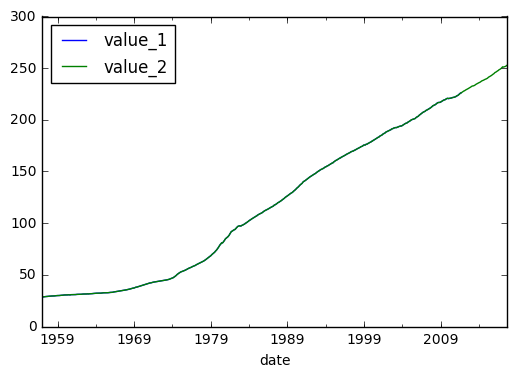

In [139]:
%matplotlib inline
cpi, ust_3m = construct_dataframe(pd.to_datetime('2011-11-07'))
temp1 = cpi
temp1 = temp1[['date', 'value']]
temp1.rename(columns = {'value': 'value_1'}, inplace = True)

cpi, ust_3m = construct_dataframe(pd.to_datetime('2017-11-07'))
temp2 = cpi
temp2 = temp2[['date', 'value']]
temp2.rename(columns = {'value': 'value_2'}, inplace = True)

temp3 = temp1.merge(temp2, how = 'outer', on = 'date')
temp3[temp3['date'] > pd.to_datetime('2010-01-01')]
temp3.set_index('date').plot()

<a id='#supplemental_content_1'></a>
<span class="label label-success"> Commentary and Supplemental Content </span>
    
In the previous notebook we talk a little about Bloomberg data. Though Hull et al. use Bloomberg data in their paper we will just have to do our best to proceed without it or try to assemble the same variable idea from other data sources. (though if you have access to Bloomberg data, then definitely use that)

FRED and ALFRED are data repositories from the Federal Reserve, probably the main government financial organization in the country. They regulate banks and implement monetary policy for the United States. To a large degree that means they influence the interest rate you recieve at your bank and during recessions they will try to make money cheaper to borrow in order to try to get businesses to accelerate investment and business activity. Given those functions, they both collect their own data and aggregate data from across the government to form one of the best datasets available on the health of the American economy.
    
Luckily for us, FRED and ALFRED are free and accessible through an API. FRED contains economic data when viewed from today. ALFRED contains economic data as published. So for example, if we want to know what the public thought was the GDP in 2000 from the perspective of a person in 2001, we'd use ALFRED. If we want to know what GDP was in 2000 from the perspective of today, we'd use FRED. Those two are different because most economic series are hard to collect and involve a lot of estimates over time. There is a tradeoff between timeliness (get me the 2000 GDP figure as soon as possible) and accuracy (get me the most accurate estimate of 2000 GDP). 
    
    
 <a href='#snap_back_1'>go back to main body</a>